<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/leobergman/LeoBergman_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization**
**Leo Bergman**

# **Abstract**

In this lab I performed some experiments with optimization techniques to find extreme points. I tried out both gradient descent as well as newtons method.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [13]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2021 Leo Bergman (bergmanleo@gmail.com)
# Template by Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [14]:
# Load neccessary modules.
from google.colab import files
from scipy.sparse import random
import time
import timeit
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import tri, axes
import mpl_toolkits
from scipy.interpolate import lagrange
import scipy.optimize as opt
import numpy as np
from numpy.linalg import inv,norm,solve,lstsq,det
import unittest
from functools import reduce
from numpy.polynomial import polynomial as Poly
import pandas as pd


# **Introduction**

In this lab I tried to find the global minimum of a function with two different methods. I randomly picked the starting guess and then moved downwards to the global minima in every iteration.

# **Method**

**Gradient descent**

We have a differentiable convex function $ f: R^n \rightarrow R$

I used algorithm 15.1 from the lecture notes. I picked a constant learning rate of $\alpha = 0.01$ The gradient descent methods moves the approximative point in the direction of the greatest descent. In the case of a $x^2$ function we move against the global minimum. There could be situations when the gradient descent is moving towards a local minima and get stucked there.

**Newtons method in optimization**
Given a twice differentiable function $f: R \rightarrow R$ we try to find $min f(x)$
The method uses taylor expansion 

$f(x_n+x) \approx f(x_n) + f'(x_n)*x + \frac{1}{2} f''(x_n)*x^2$

min can be found when we set the derivative to zero given that we know that the function is convex, and that the second derivative is positive:

$\frac{d}{dx} f(x_n+x) \Rightarrow$
$x = - \frac{f'(x_n)}{f''(x_n)}$

I decided to pick a $x^2$ function which was

$f(x) = 8x^2 - 10x + 1000$

in 1d I get

$ \nabla f(x) = 16x - 10$

and 

$ \triangle f(x) = 16$

In [15]:


def gradientDescent(f, x0,TOL = 1e-4):
  x = x0
  df = lambda x: 16*x-10 
  Df = df(x)
  alpha = 0.01
  e = []
  while np.linalg.norm(Df) > TOL:
    Df = df(x)
    x -= alpha*Df
    e.append(x)
  return x,e


def newtonMin(f,x0,TOL = 1e-4):
  x = x0
  df = lambda x: 16*x-10 
  Df = df(x)
  e = []
  while np.linalg.norm(Df)>TOL:
    Df = df(x)

    Hf = 16
    dx = -Df/Hf
    x+=dx
    e.append(x)
  return x,e

if __name__ == '__main__':
  #backpropagation()
  #f = lambda x: 2*x[0]**2 + 3*x[1]**2 + 3
  x0 = np.random.random(2)



# **Results**

**Proof of correctness**

.

0.6249990624999064
0.6249955652262364


.

[0, 1]
0.6249990624999064
0.625



----------------------------------------------------------------------
Ran 2 tests in 3.220s

OK


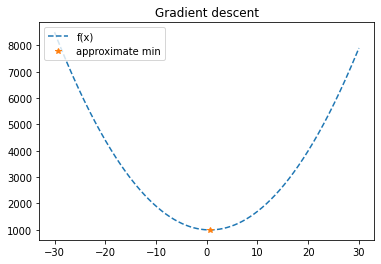

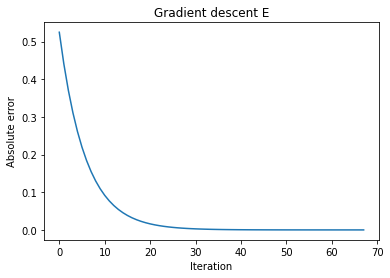

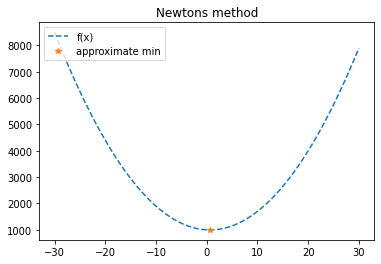

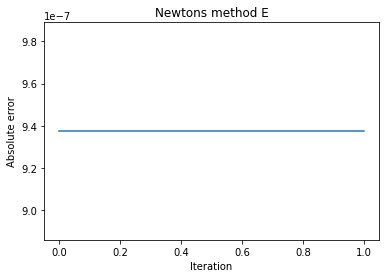

In [16]:

class Test(unittest.TestCase):
  def testGradientDescent(self):
    x0 = np.linspace(-30,30,num = 10000000)
    xp = np.random.randint(1)
    f = lambda x: 8*x**2 - 10*x + 1000
    x,e = gradientDescent(f,xp)
    np.testing.assert_almost_equal(min(f(x0)),f(x),decimal =3)
    plt.figure(1)
    plt.plot(x0,f(x0),'--',label = 'f(x)')
    plt.legend('f(x)')
    plt.plot(x,f(x),'*',label = 'approximate min')
    plt.legend(loc="upper left")
    plt.title("Gradient descent")

    plt.figure(2)

    i = np.argmin(f(x0))
    n = [i for i in range(len(e))]

    print(x0[i])
    print(x)
    plt.plot(n,abs(x0[i]-e))
    plt.title("Gradient descent E")

    plt.xlabel('Iteration')
    plt.ylabel('Absolute error')


  def testNewton(self):
    x0 = np.linspace(-30,30,num = 10000000)
    xp = np.random.randint(1)
    f = lambda x: 8*x**2 - 10*x + 1000
    x,e = newtonMin(f,xp)
    np.testing.assert_almost_equal(min(f(x0)),f(x),decimal =4)
    plt.figure(3)
    plt.plot(x0,f(x0),'--',label = 'f(x)')
    plt.legend('f(x)')
    plt.plot(x,f(x),'*',label = 'approximate min')
    plt.legend(loc="upper left")
    plt.title("Newtons method")


    i = np.argmin(f(x0))
    n = [i for i in range(len(e))]
    print(n)
    print(x0[i])
    print(x)
    plt.figure(4)
    plt.plot(n,abs(x0[i]-e))

    plt.xlabel('Iteration')
    plt.ylabel('Absolute error')
    plt.title("Newtons method E")

if __name__ == '__main__':
  unittest.main(argv=['first-arg-is-ignored'],exit = False)

# **Discussion**

I did some simuations of both methods and from what I can see the newton's method seems to be faster than gradient descent. If course this needs more quantitative arguments to be proven in general.